### Assignment 5 Risk

Note: There was no assignment 4!! 

## Author: 
Grace Mary Smyth.

## Lecturer:
Andrew Beatty.

As per the guidlines for the assignemnt: The program should simulates 1000 individual battle rounds in Risk (3 attacker vs 2 defender) and plots the result.

One battle round is one shake of the attacker and defender dice.

## overview of risk:

RISK is the game of "global domination". The objective of the game is to attack and capture enemy territories in order to wipe out the opponent and become the ruler of the world.

This game is played on a board that is divided up into 42 territories and each player is given multiple tokens where each token represents one army. The number of armies is determined at the beginning of each turn and is based on the number of territories that the player occupies.

In order to win the game, a player must conquer all the territories. On each turn, a player can attack adjoining territories controlled opponents. The attacker must have at least two armies in order to attack because at least one army remains in the currently occupied territory and one army can attack the defending army.

An attacker may choose to withdraw from the war at any time but if they remain in battle until the end, there are two possible outcomes:

The defending army will be destroyed and the attacker will now have a new territory in its possession.
The attacker will only have one army left and will be unable to engage in battle, resulting in a failure to conquer the territory.

In order to determine if a battle is won or lost by the attacking army, both players roll dice. The number of dice depends on the number of armies the player has.

If the defender has one army, one die is rolled but if the defender has two or more armies then two dice may be rolled. An attacker rolls either one, two, or three dice depending on the number of armies he/she has. The attacker must have at least one more army in the territory than the number of dice to be rolled.

For example, if an attacker has three armies, he/she can roll a maximum of two dice.

A player does have the option of rolling less than their maximum number of dice allotted. This would decrease the potential number of armies lost but would reduce the odds of winning.

Once the dice are rolled, they are placed in descending order. The attacker's highest die is then compared to the defender's highest and if each player has at least two dice then the second largest for both sides is compared.

The attacker loses one army for every die in the compared pairs that is less than or equal to the defender's die and the defender loses one army for every compared die that is less than the attacker's die.

Armies are removed from the board when they are lost and the dice are rolled again until one side can no longer engage in battle. Throughout the course of a single battle, armies are lost and can never be gained.

Risk can be played with 2 - 6 players and the average duration of a game is between 60 and 120 minutes.

The game was first published in 1959 by Parker Brothers and currently by Hasbro. The game was created by Albert Lamorisse. For more information check here the history of Risk.


https://www.ultraboardgames.com/risk/index.php



Import numpy and matplotlib. This will allow us to manipulate the data. 

In [28]:
import numpy as np
import matplotlib.pyplot as plt

As this is a board game that is run using a dice we have to throw the dice to get a randomly generated number between. This is run on the assumption that a standard 6 sided dice is used. (also specified in the assignment overview)

In [29]:
def roll_dice(n):
    return np.random.randint(1, 7, n)[::-1]
print(roll_dice(10))

[1 2 4 5 3 1 1 1 4 5]


Defining simulate battle using the zip() function. This function in python creates pairs of elements repeatedly. The > allows us to compare the values of the dice roll, allowing us to determine which wins ie the defender or attacker.  

In [30]:
def battle():
    attacker_wins = 0
    defender_wins = 0
    for i in range(1000):
        attacker_dice = roll_dice(3)[-2:]
        defender_dice = roll_dice(2)[-2:]
    
        for a, d in zip(attacker_dice, defender_dice):
            if a > d:
                defender_wins += 1
            else:
                attacker_wins += 1
    
    return attacker_wins, defender_wins

print(battle())  

(1147, 853)


As the simulate battle and the attacker and defender has been defined. The battle now commences!!

In [31]:
attacker_wins, defender_wins = battle()

Now to plot the results using a bar chart. A bar chart is appropriate as there is two distinct categories of data. Either attacker wins or defender wins. 

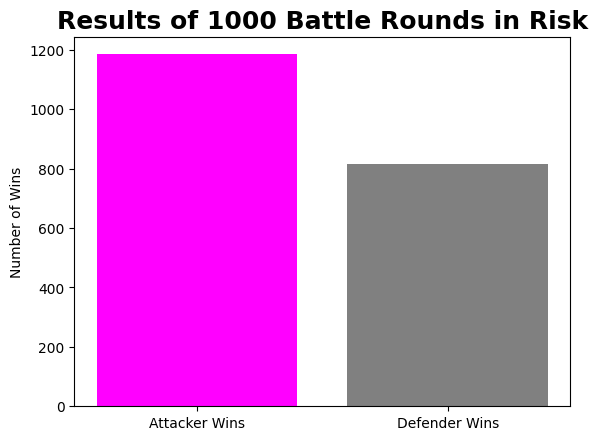

In [32]:
labels = ['Attacker Wins', 'Defender Wins']
sizes = [attacker_wins, defender_wins]

plt.bar(labels, sizes, color=['magenta', 'grey'])
plt.title('Results of 1000 Battle Rounds in Risk', fontdict={'fontsize': 18, 'fontweight': 'bold'})
plt.ylabel('Number of Wins')
plt.show()

We could also plot the data as a pie chart 

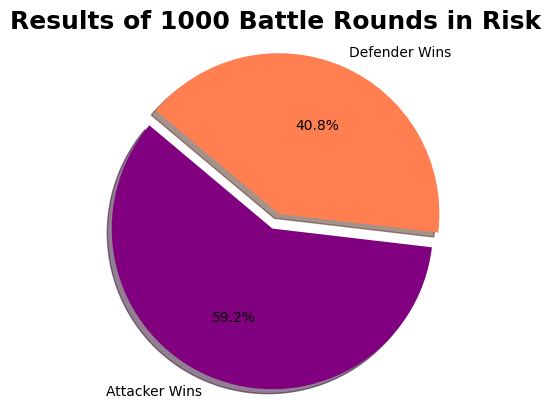

In [33]:
labels = ['Attacker Wins', 'Defender Wins']
sizes = [attacker_wins, defender_wins]  
colors = ['purple', 'coral']    
explode = (0.1, 0) 

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)   
plt.axis('equal')
plt.title('Results of 1000 Battle Rounds in Risk', fontdict={'fontsize': 18, 'fontweight': 'bold'}) 
plt.show()


For the extra couple of marks requsted which simulates a series of full rounds for armies of arbitrary sizes until one side is wiped out. We need to import random to deal with the data. This will return an integer between 1 and 6 (sides on a dice)

In [34]:
import random
def roll_dice(num_dice):
    return sorted([random.randint(1, 6) for _ in range(num_dice)], reverse=True)
print(roll_dice(10))


[6, 6, 5, 5, 3, 2, 2, 1, 1, 1]


Code that I used above to define battle. a_troups are the attacker army, d_troups are the defender army. 

In [35]:
def battle(a_troops, d_troops):
    attacker_wins = 0
    defender_wins = 0
    while a_troops > 1 and d_troops > 0:
        attacker_dice = roll_dice(min(3, a_troops))[-2:]
        defender_dice = roll_dice(min(2, d_troops))[-2:]
    
        for a, d in zip(attacker_dice, defender_dice):
            if a > d:
                d_troops -= 1
            else:
                a_troops -= 1
    
    return a_troops, d_troops

print(battle(10, 10))  

(0, 6)


In [36]:
num_battles = 2345
initial_a_troops = 10
initial_d_troops = 10

attacker_wins = 0
defender_wins = 0

for i in range(num_battles):
    a_troops, d_troops = battle(initial_a_troops, initial_d_troops)
    if a_troops > 0:
        attacker_wins += 1
    else:
        defender_wins += 1

print(attacker_wins, defender_wins)

1531 814


In [37]:
def simulate_battles(num_battles, initial_attacker_armies, initial_defender_armies):
    attacker_wins = 0
    defender_wins = 0
    
    for _ in range(num_battles):
        attacker_armies, defender_armies = battle(initial_attacker_armies, initial_defender_armies)
        if attacker_armies > 0:
            attacker_wins += 1
        else:
            defender_wins += 1
            
    return attacker_wins, defender_wins

By changing the values of the defined any arbitrary numbers can be used

In [38]:
num_battles = 2345
initial_a_troops = 10
initial_d_troops = 10

Now to plot

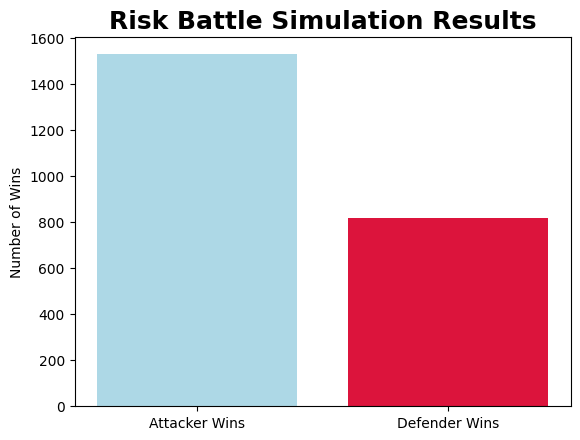

In [40]:
def plot_results(attacker_wins, defender_wins):
    labels = ['Attacker Wins', 'Defender Wins']
    sizes = [attacker_wins, defender_wins]
    
    plt.bar(labels, sizes, color=['lightblue', 'crimson'])
    plt.ylabel('Number of Wins')
    plt.title('Risk Battle Simulation Results', fontdict={'fontsize': 18, 'fontweight': 'bold'})
    plt.show()


attacker_wins, defender_wins = simulate_battles(num_battles, initial_a_troops, initial_d_troops)
plot_results(attacker_wins, defender_wins)

## References

https://www.ultraboardgames.com/risk/index.php

https://www.w3schools.com/python/ref_func_zip.asp

https://www.w3schools.com/python/gloss_python_comparison_operators.asp

https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

https://www.w3schools.com/python/matplotlib_pie_charts.asp

https://www.w3schools.com/python/ref_random_randint.asp